In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cycler, rcParams
from matplotlib.lines import Line2D
from model.calculate_features import CalculateFeatures
pdf = pd.DataFrame



dtypes = {'Magnitude': np.float64, 'Latitude': np.float64, 'Longitude': np.float64, 'Depth': np.float64}
df = pd.read_csv('../../data/DATA_3_south.csv', delimiter=',', dtype=dtypes, parse_dates=["Datetime"],
                 date_parser=np.datetime64)
df = df.reset_index(drop=True)

In [2]:
len(df.index)
df.head()

,Magnitude,Latitude,Longitude,Depth,Datetime
0,3.9,16.8023,-94.9130,114.9,2017-01-01 00:54:31
1,3.9,15.2842,-93.1210,100.7,2017-01-01 04:10:39
2,3.9,17.4503,-94.9543,138.3,2017-01-01 04:23:51
3,3.9,16.4077,-93.7075,139.4,2017-01-01 04:26:01
4,4.1,16.7017,-98.8633,27.5,2017-01-01 08:49:23


In [3]:
df_model = CalculateFeatures(df, 50, trimFeatures=False)
df_model.get_trim_features()
features = df_model.features
trim_features = df_model.get_trim_features()

In [4]:
df_selected = trim_features
df_insight = pd.DataFrame()

df_selected.drop("old_index", axis=1, inplace=True)


In [5]:
import warnings

warnings.filterwarnings('ignore')
df_selected = features.drop(['firstT', 'lastT'], axis=1)
min_mag, max_mag = df_selected.maxAMag.agg(['min', 'max'])

df_groups_to_render = []


def apply_the_thing(aggregate):
    df_insight_me = pd.DataFrame()
    df_insight_l = pd.DataFrame()
    for mag in np.arange(min_mag, max_mag + .1, .1).round(1):
        df_insight_me[mag] = df_selected[df_selected.next14dMaxMag > mag].apply(aggregate)
        df_insight_l[mag] = df_selected[df_selected.next14dMaxMag <= mag].apply(aggregate)
    return [df_insight_me, df_insight_l]


max = apply_the_thing(pdf.max)
min = apply_the_thing(pdf.min)
df_groups_to_render.append(["Minimum", *min])
df_groups_to_render.append(["Maximum", *max])
df_groups_to_render.append(["Mean", *apply_the_thing(pdf.mean)])
df_groups_to_render.append(["Variance", *apply_the_thing(pdf.var)])
df_groups_to_render.append(["sum", *apply_the_thing(pdf.sum)])
df_groups_to_render.append(["diff max min", max[0] - min[0], max[1] - min[1]])
df_groups_to_render.append(["mean diff", *apply_the_thing(lambda x: pdf.mean(pdf.diff(x)))])
df_groups_to_render.append(["max diff", *apply_the_thing(lambda x: pdf.max(pdf.diff(x)))])
df_groups_to_render.append(["min diff", *apply_the_thing(lambda x: pdf.min(pdf.diff(x)))])

In [6]:
def plot_relevant_features(df_groups_to_render):
    for group in df_groups_to_render:
        title = group[0]
        ax1 = group[1]
        ax2 = group[2]
        fig, axes = plt.subplots(nrows=len(ax1.T.columns), ncols=1, constrained_layout=True)
        fig.suptitle(title, fontsize=20)
        fig.set_size_inches(10, 32)
        CMAP_1 = plt.cm.get_cmap("Set1")
        rcParams['axes.prop_cycle'] = cycler(color=CMAP_1(np.linspace(0, 1, len(ax1.T.columns))))
        custom_lines = [Line2D([0], [0], color=CMAP_1(0), lw=4),
                        Line2D([0], [0], color=CMAP_1(1), lw=4)
                        ]

        fig.legend(custom_lines, ['next14dMaxMag <= mag', 'next14dMaxMag > mag'], loc=(.4, .972))

        for i, column in enumerate(ax1.T.columns):
            if i == len(ax1.T.columns) - 1:
                ax1.T[column].plot(ax=axes[i], kind="line", label=str(i), title=column,
                                   xticks=ax1.columns[::2], color=CMAP_1(1))
                ax2.T[column].plot(ax=axes[i], label=str(i), kind="line", color=CMAP_1(0))
            elif i == 0:
                ax1.T[column].plot(ax=axes[i], kind="line", label=str(i), title=column,
                                   xticks=ax1.columns[::2], color=CMAP_1(1))
                ax2.T[column].plot(ax=axes[i], label=str(i), kind="line", color=CMAP_1(0))

                axes[i].xaxis.set_ticks_position('top')
            else:
                ax1.T[column].plot(ax=axes[i], kind="line", title=column, color=CMAP_1(1))
                ax2.T[column].plot(ax=axes[i], kind="line", color=CMAP_1(0))
                axes[i].tick_params(
                    axis='x',  # changes apply to the x-axis
                    which='both',  # both major and minor ticks are affected
                    bottom=False,  # ticks along the bottom edge are off
                    top=False,  # ticks along the top edge are off
                    labelbottom=False)  # labels along the bottom edge are off
                plt.rcParams['axes.titley'] = 1.0  # y is in axes-relative coordinates.
                plt.rcParams['axes.titlepad'] = -14  # pad is in points...
        plt.show()
        plt.clf()


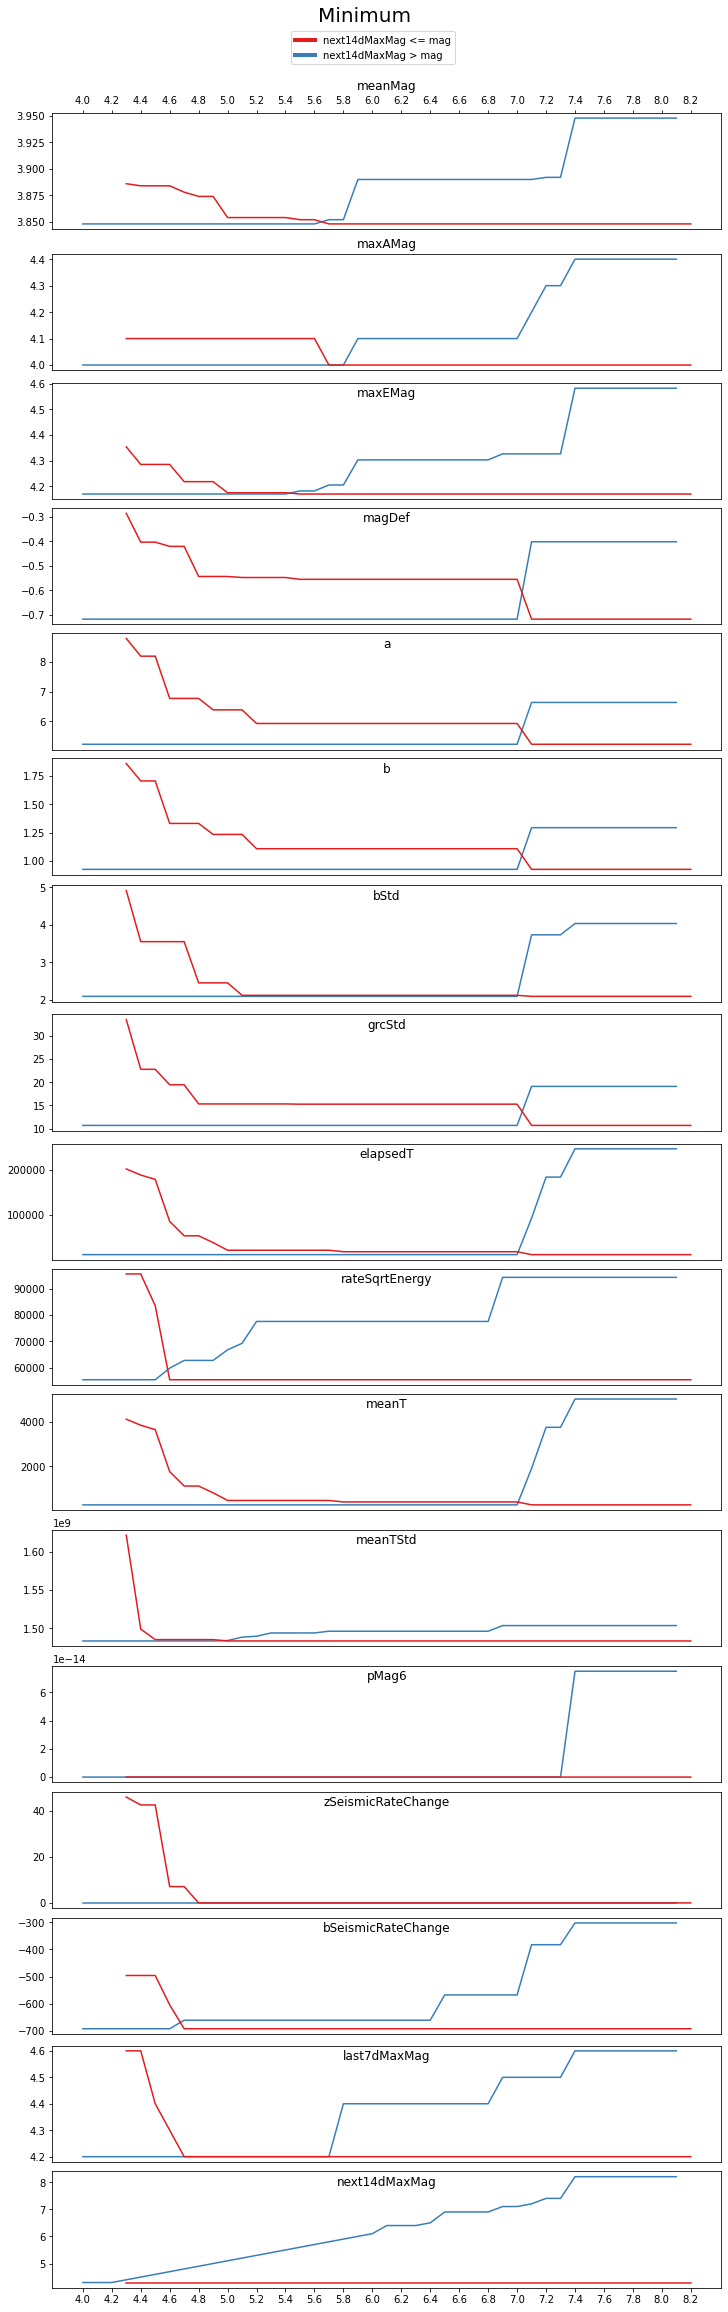

<Figure size 432x288 with 0 Axes>

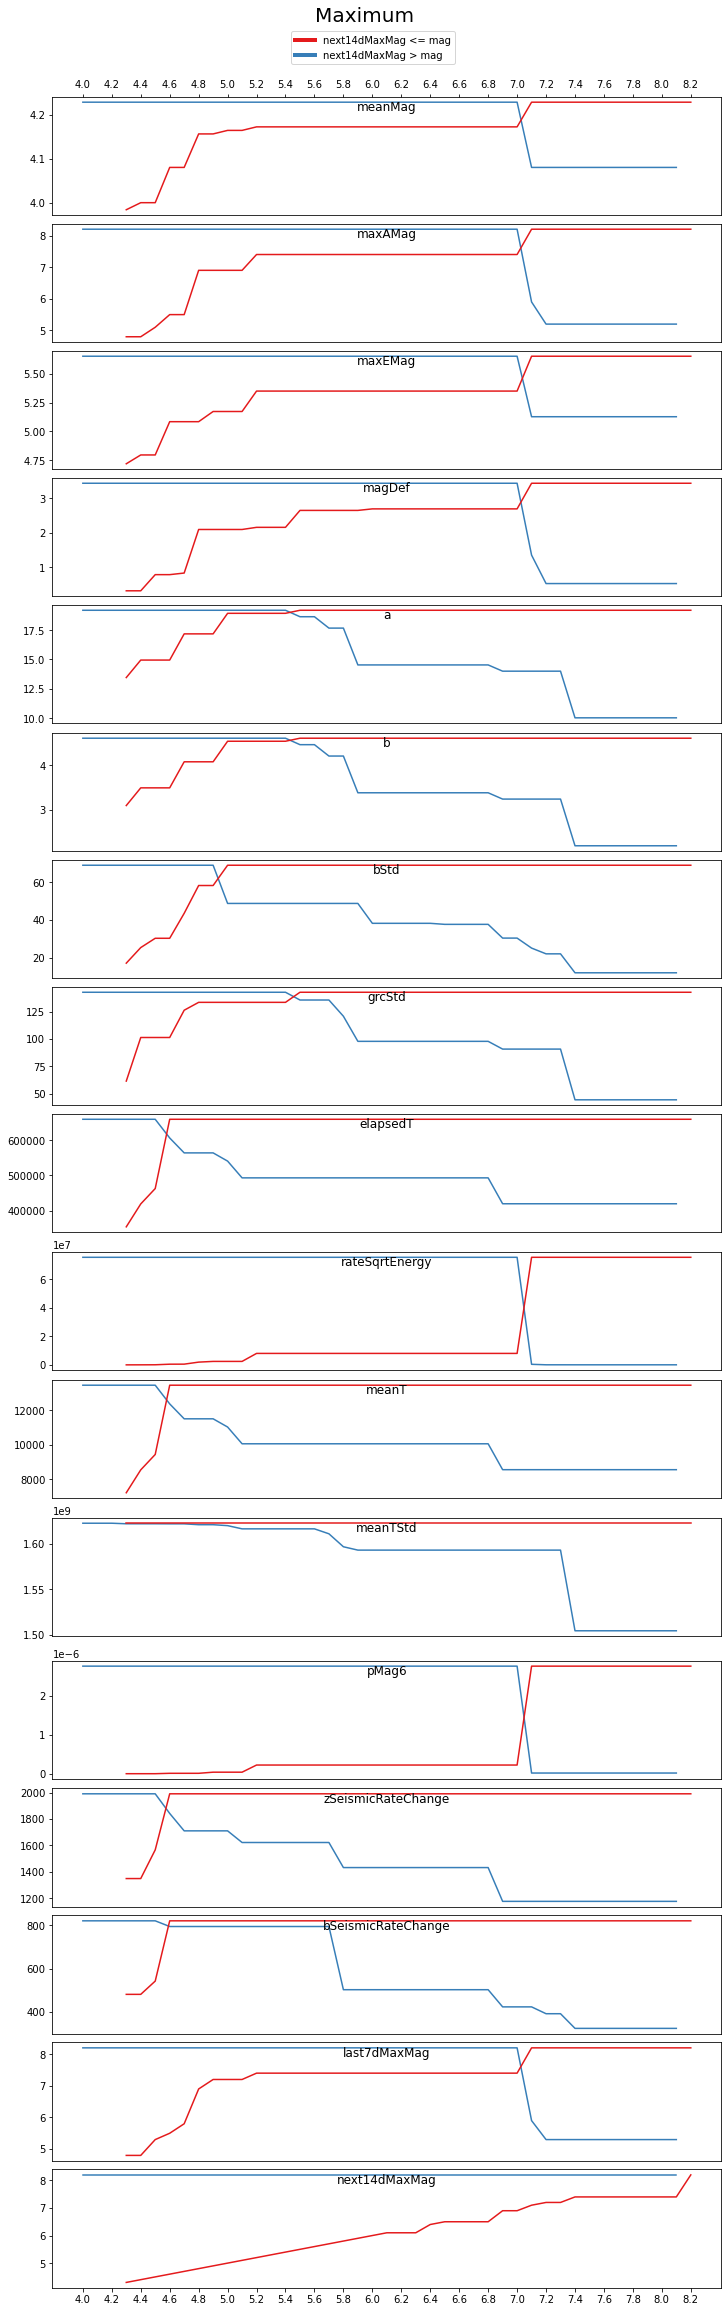

<Figure size 432x288 with 0 Axes>

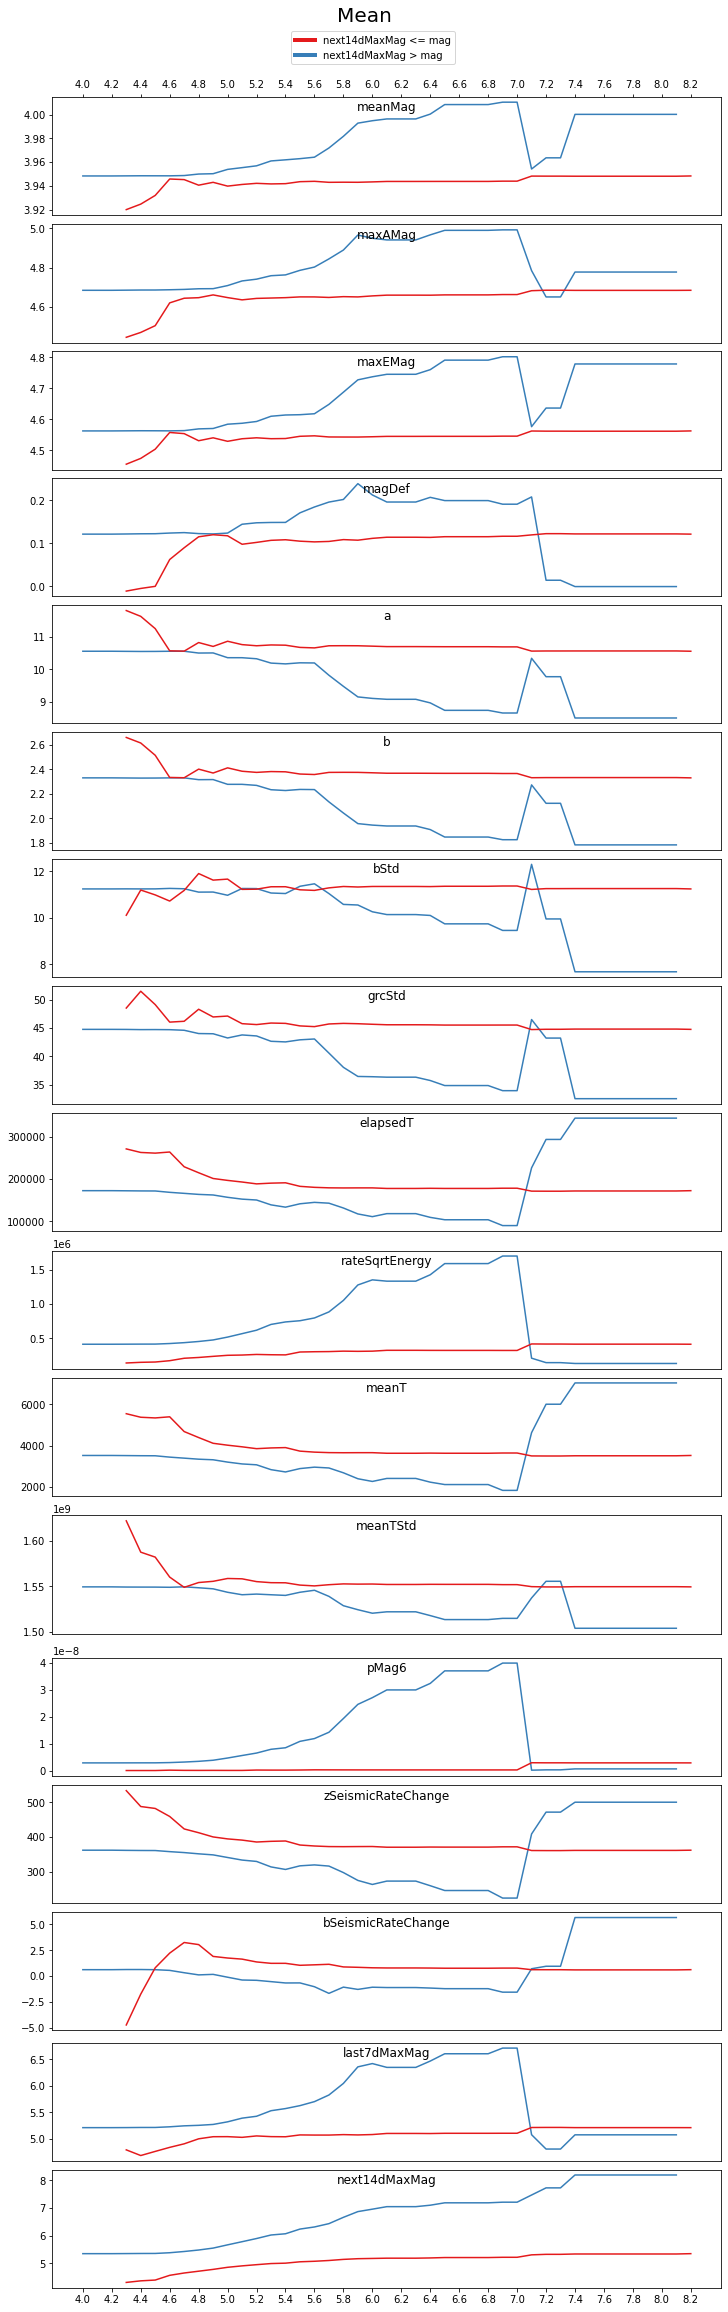

<Figure size 432x288 with 0 Axes>

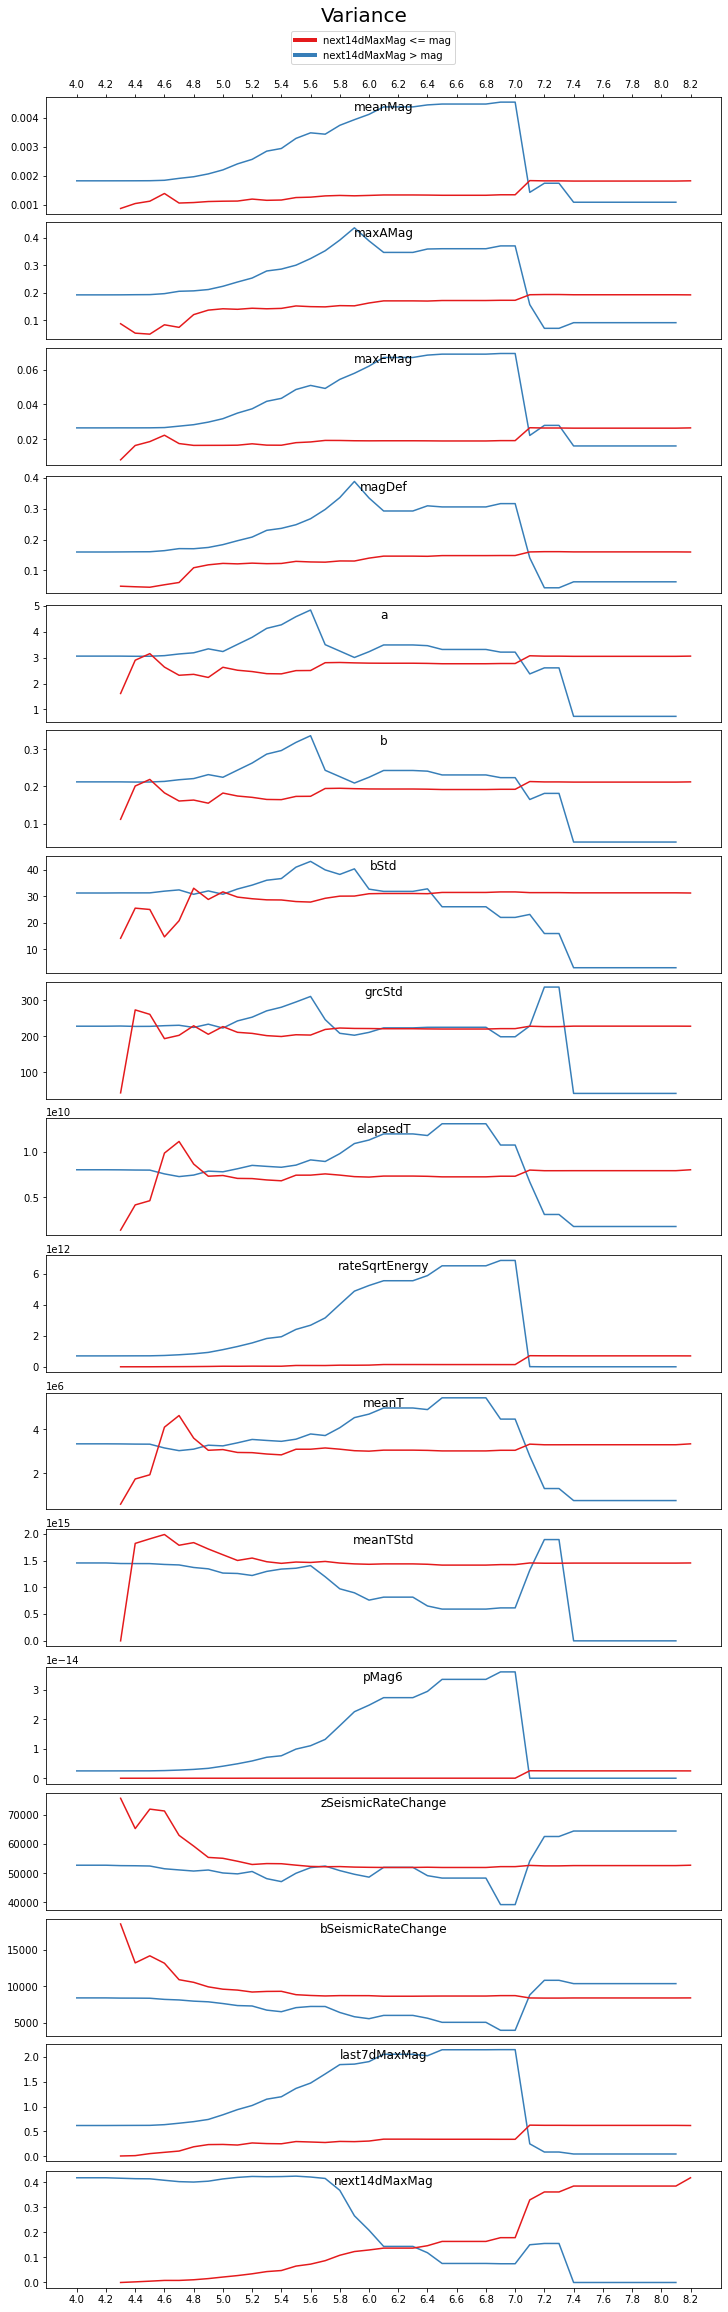

<Figure size 432x288 with 0 Axes>

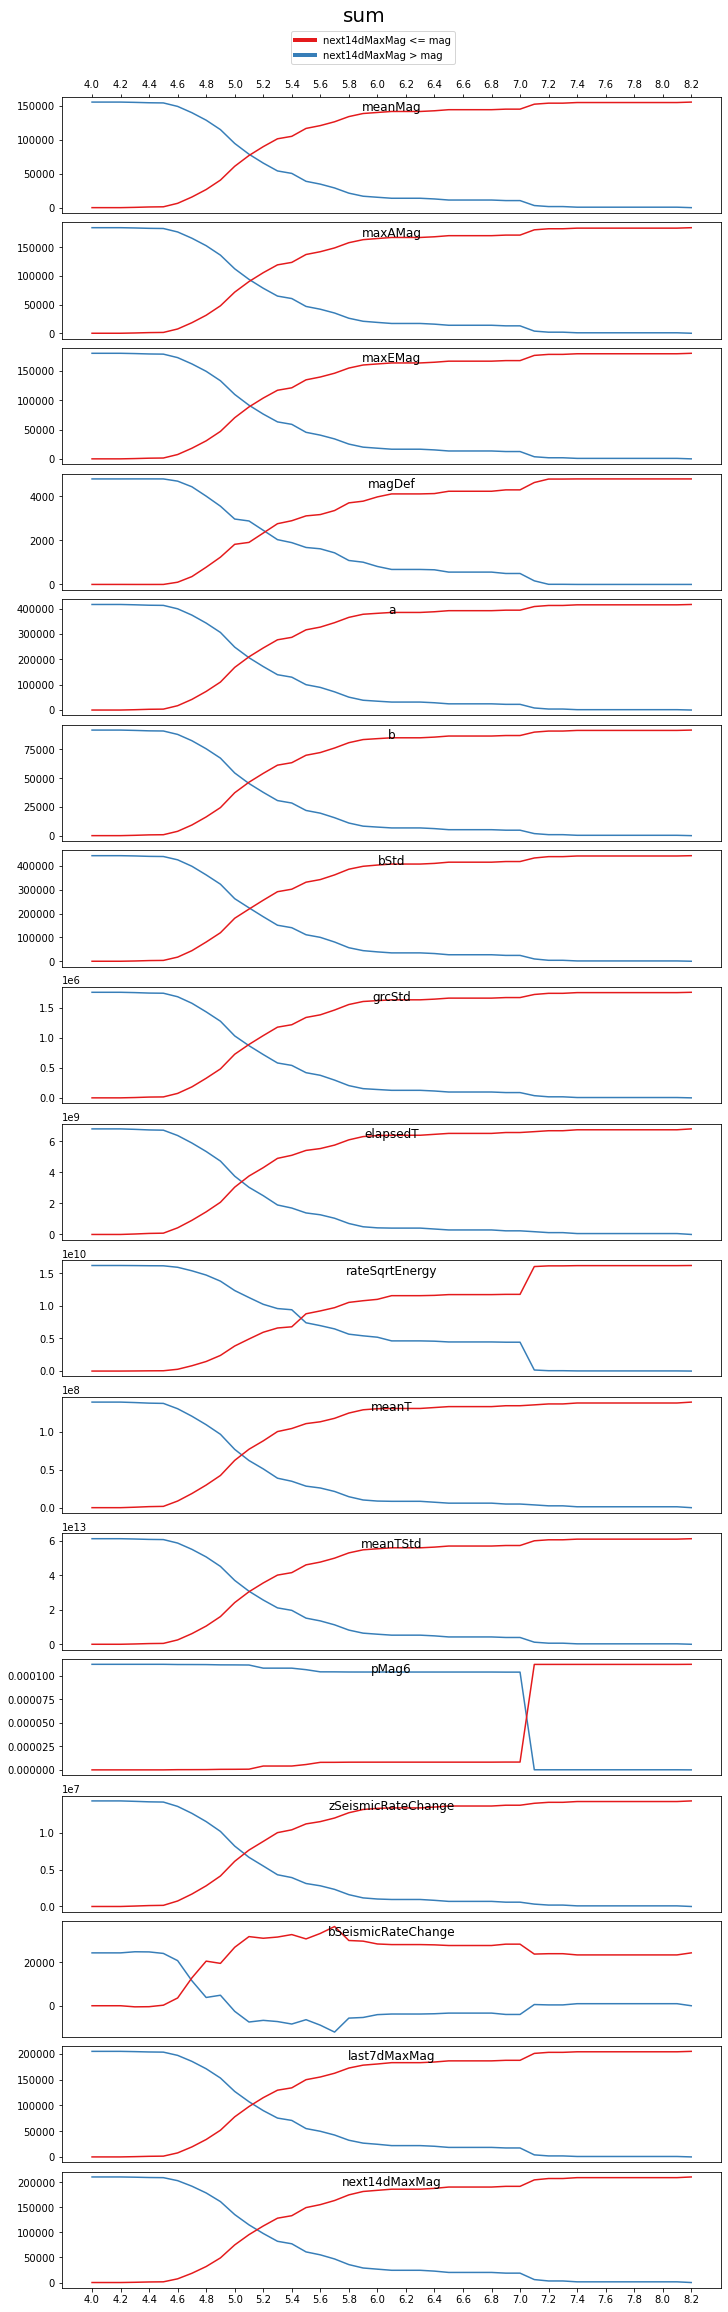

<Figure size 432x288 with 0 Axes>

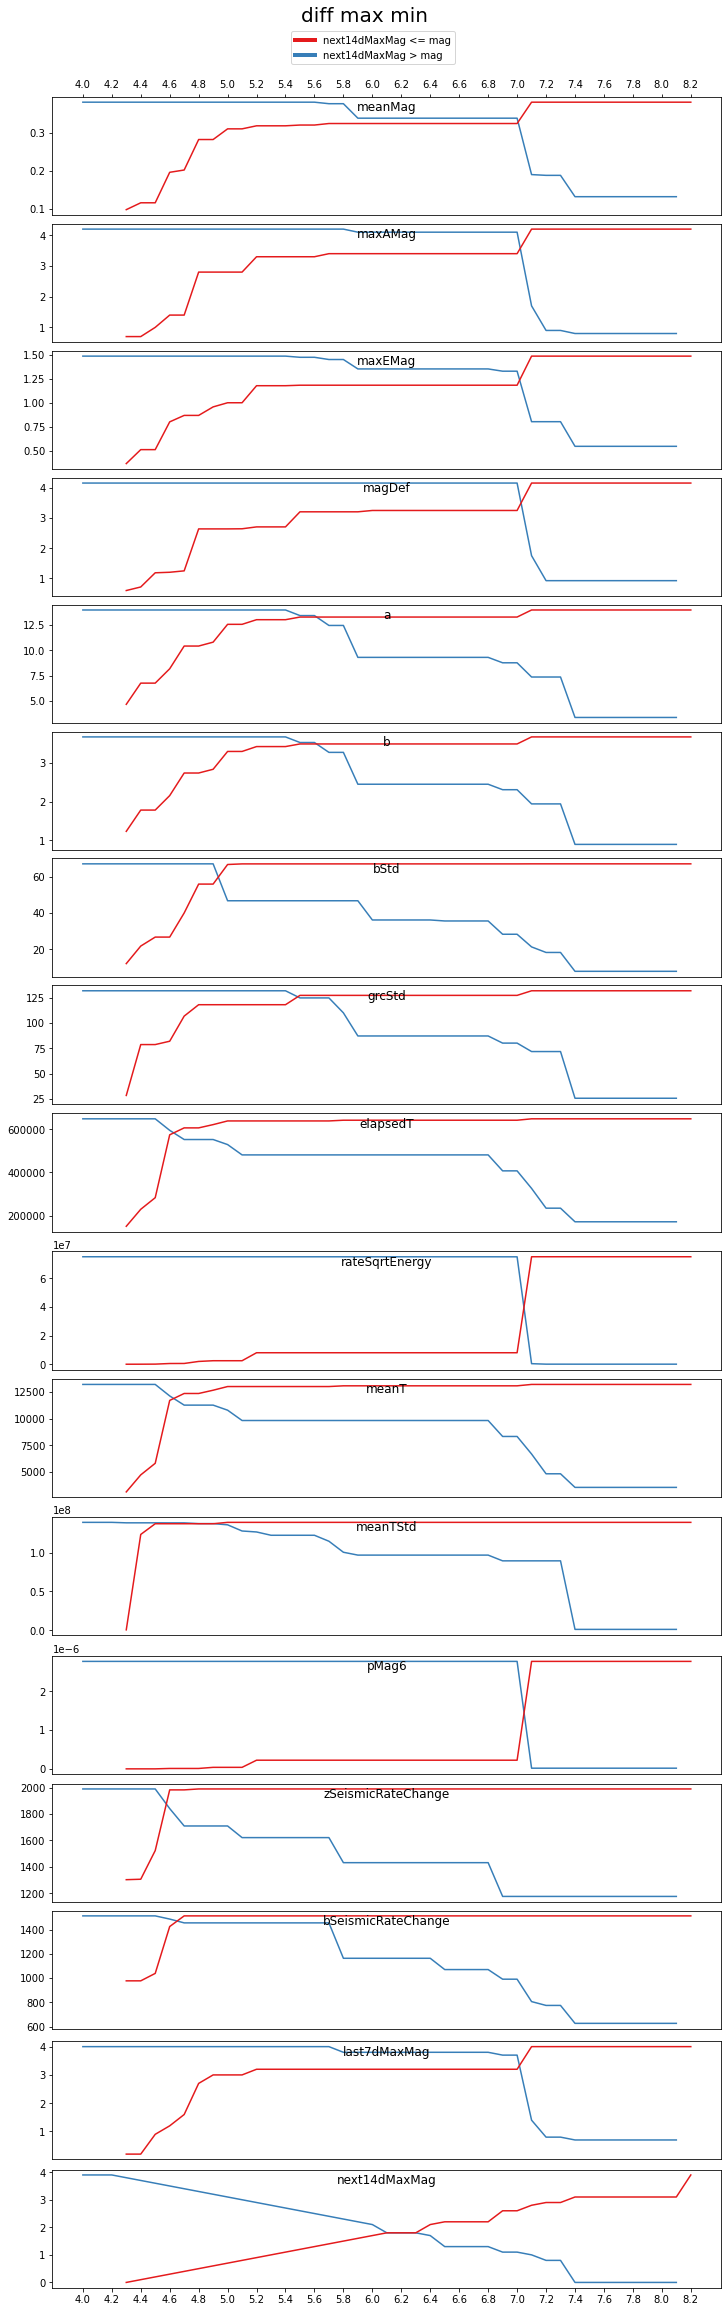

<Figure size 432x288 with 0 Axes>

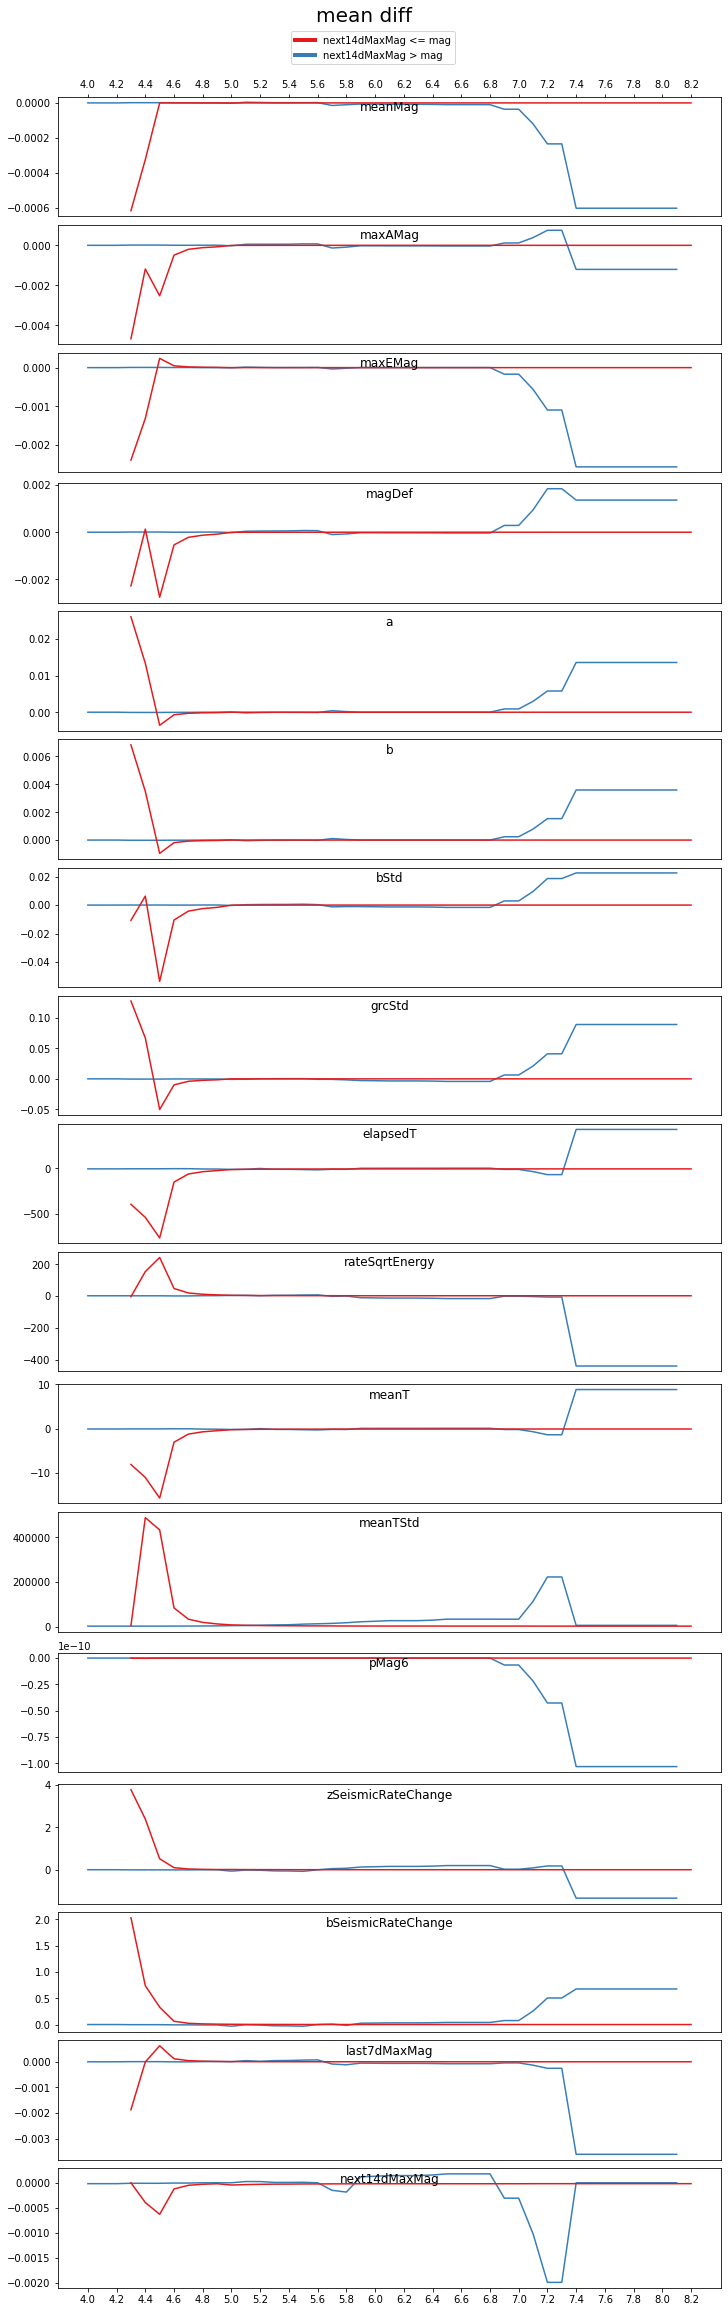

<Figure size 432x288 with 0 Axes>

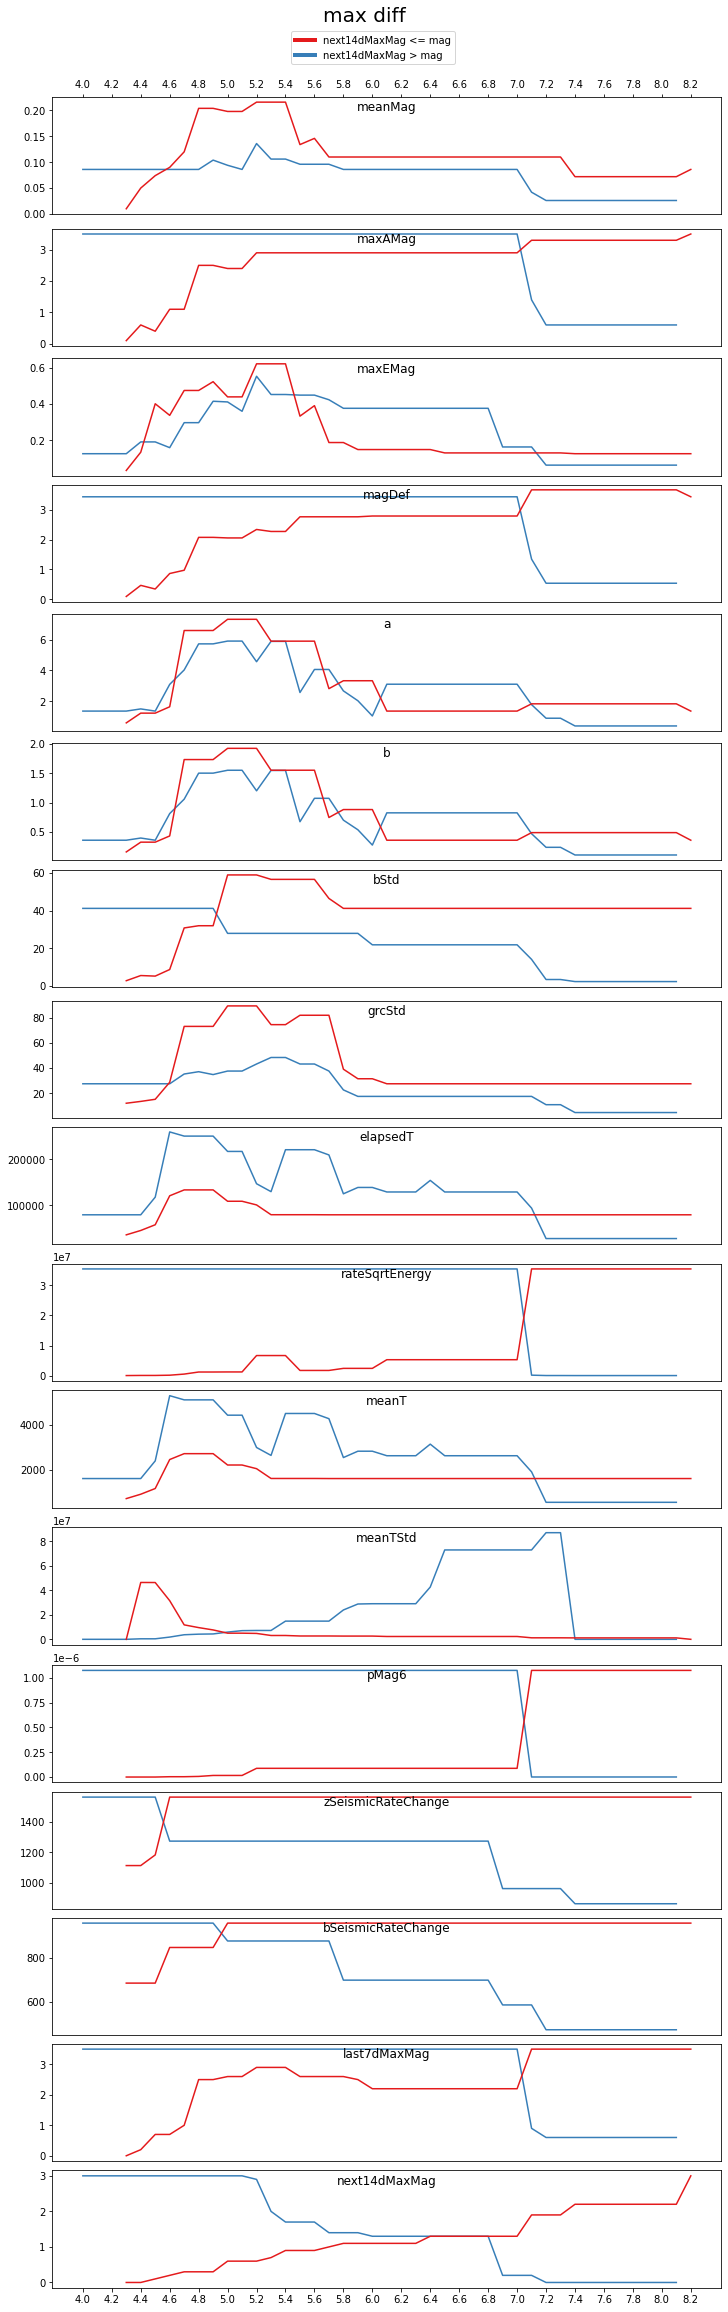

<Figure size 432x288 with 0 Axes>

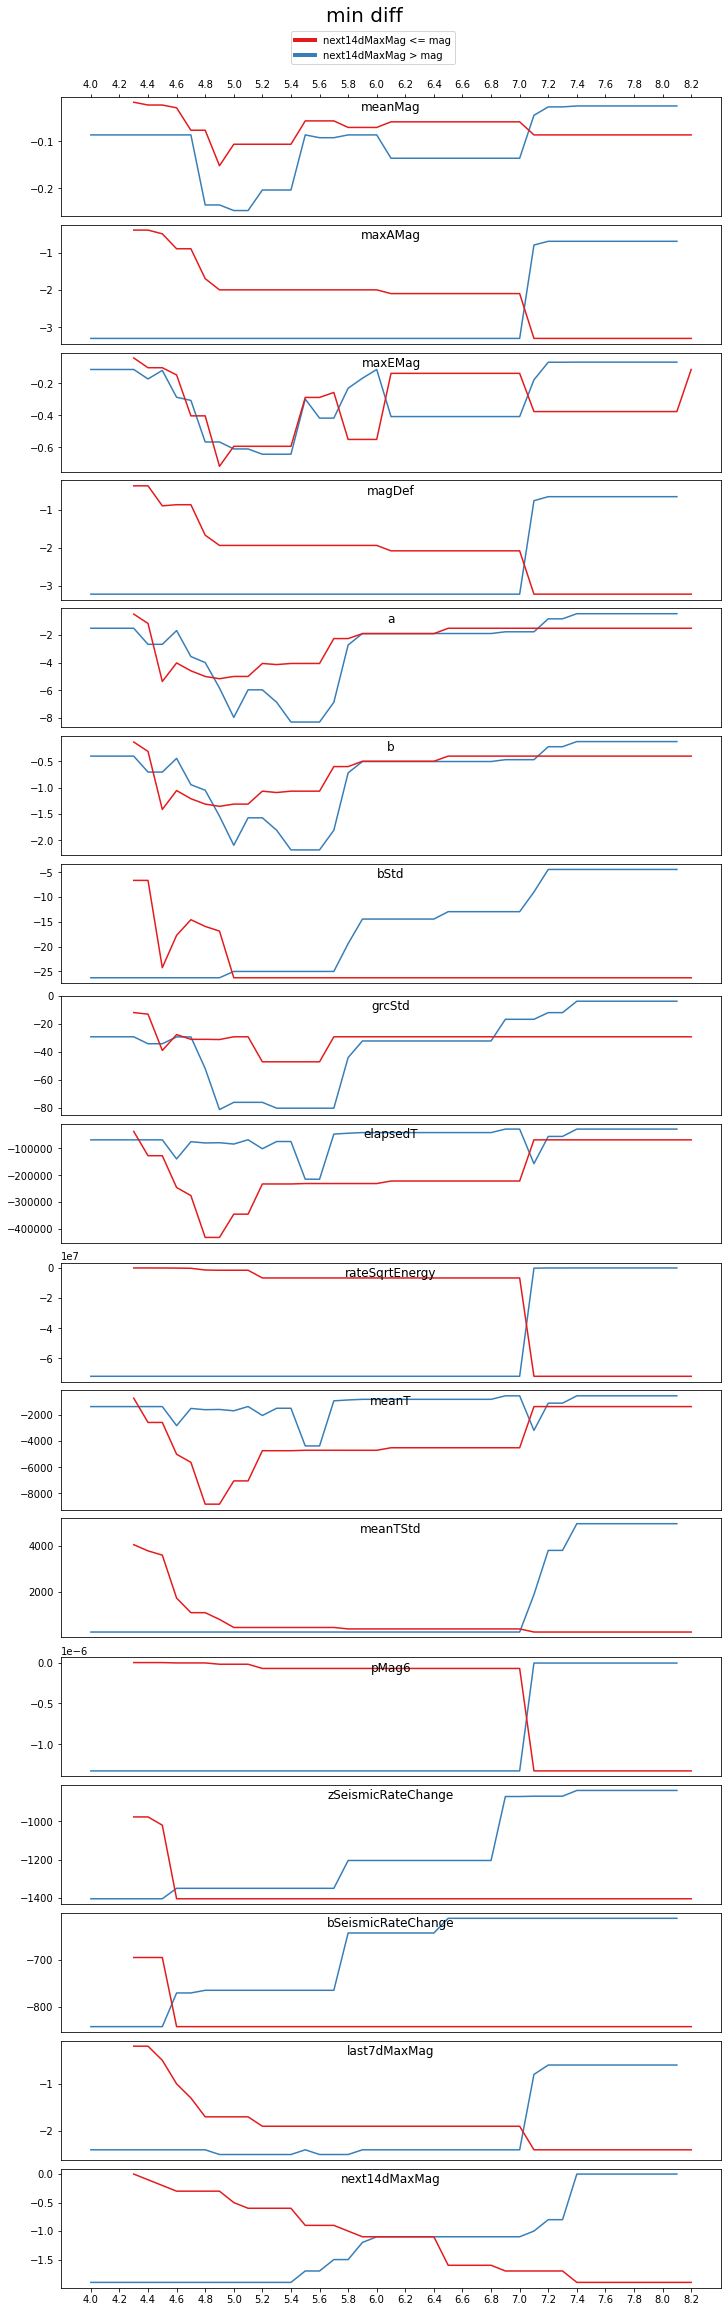

<Figure size 432x288 with 0 Axes>

In [7]:
plot_relevant_features(df_groups_to_render)

,firstT,lastT,meanMag,maxAMag,maxEMag,magDef,a,b,bStd,grcStd,elapsedT,rateSqrtEnergy,meanT,meanTStd,pMag6,zSeismicRateChange,bSeismicRateChange,last7dMaxMag,next14dMaxMag
0,2017-01-01 00:54:31,2017-01-05 19:01:25,3.920,4.4,4.452166,-0.052166,11.613363,2.608475,9.326278,46.432020,410814,87680.297260,8383.959184,1.483392e+09,2.234340e-16,NaN,NaN,4.4,5.0
1,2017-01-01 04:10:39,2017-01-05 23:48:11,3.918,4.4,4.442761,-0.042761,11.745555,2.643751,9.626963,47.781183,416252,86280.164530,8494.938776,1.483401e+09,1.372440e-16,521.440313,59.394352,4.4,5.0
2,2017-01-01 04:23:51,2017-01-06 03:34:05,3.918,4.4,4.442761,-0.042761,11.745555,2.643751,9.626963,47.781183,429014,83713.564233,8755.387755,1.483409e+09,1.372440e-16,798.811617,138.450647,4.4,5.0
3,2017-01-01 04:26:01,2017-01-06 07:44:08,3.918,4.4,4.442761,-0.042761,11.745555,2.643751,9.626963,47.781183,443887,80908.634508,9058.918367,1.483418e+09,1.372440e-16,862.351436,158.927921,4.4,5.0
4,2017-01-01 08:49:23,2017-01-06 08:43:52,3.916,4.4,4.433093,-0.033093,11.886313,2.681268,9.950613,49.237072,431669,82953.115590,8809.571429,1.483427e+09,8.173144e-17,781.600921,-128.429872,4.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39406,2021-05-27 05:46:09,2021-05-29 13:59:14,3.910,4.3,4.431203,-0.131203,12.062507,2.722174,9.126619,52.860716,202385,171097.340298,4130.306122,1.622188e+09,4.644661e-17,392.237173,-47.534664,4.6,4.3
39407,2021-05-27 05:48:53,2021-05-29 14:15:02,3.910,4.3,4.431203,-0.131203,12.062507,2.722174,9.126619,52.860716,203169,170437.100228,4146.306122,1.622192e+09,4.644661e-17,197.989899,12.200997,4.6,4.3
39408,2021-05-27 06:21:49,2021-05-29 16:09:39,3.918,4.3,4.463408,-0.163408,11.566727,2.591457,8.084512,47.124461,208070,169112.377303,4246.326531,1.622197e+09,2.826576e-16,495.025252,76.109385,4.6,4.3
39409,2021-05-27 06:49:52,2021-05-29 19:54:14,3.918,4.3,4.463408,-0.163408,11.566727,2.591457,8.084512,47.124461,219862,160042.264445,4486.979592,1.622201e+09,2.826576e-16,767.854153,180.894967,4.6,4.3
